In [ ]:
!pip install tensorflow_text

In [ ]:
!pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_hub as hub

In [ ]:
df = pd.read_csv('/content/Corona_NLP_train.csv', encoding="latin-1")
df_test = pd.read_csv('/content/Corona_NLP_test.csv')

In [ ]:
df.head(20)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [ ]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [ ]:
df.shape

(41157, 6)

In [ ]:
df_test.shape

(3798, 6)

In [ ]:
df_copy = df

In [ ]:
df_copy.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [ ]:
df['Sentiment'].replace({"Extremely Positive": "Positive", "Extremely Negative": "Negative"}, inplace=True)

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative


In [ ]:
index_names = df_copy[(df_copy['Sentiment'] == 'Neutral')].index

In [ ]:
df_copy.drop(index_names, inplace=True)

In [ ]:
df_copy

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
...,...,...,...,...,...,...
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive
41151,44950,89902,NaN,14-04-2020,@MrSilverScott you are definitely my man. I fe...,Positive
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


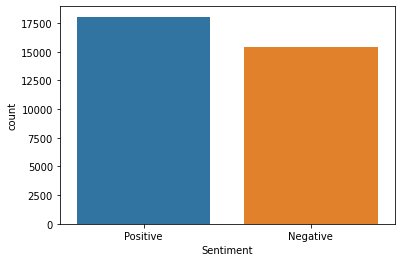

In [ ]:
sns.countplot(df.Sentiment)

In [ ]:
df['Sentiment'].value_counts()

Positive    18046
Negative    15398
Name: Sentiment, dtype: int64

In [ ]:
positive_tweet_slice = df_copy[(df_copy['Sentiment'] == 'Positive')][:3046].index

In [ ]:
positive_tweet_slice

Int64Index([   1,    2,    3,    5,    6,    8,   11,   12,   13,   14,
            ...
            7341, 7344, 7345, 7347, 7348, 7349, 7350, 7351, 7357, 7359],
           dtype='int64', length=3046)

In [ ]:
df_copy.drop(positive_tweet_slice, inplace=True)

In [ ]:
df_copy['Sentiment'].value_counts()

Negative    15398
Positive    15000
Name: Sentiment, dtype: int64

In [ ]:
negative_tweet_slice = df_copy[(df_copy['Sentiment'] == 'Negative')][:398].index
df_copy.drop(negative_tweet_slice, inplace=True)

In [ ]:
df_copy['Sentiment'].value_counts()

Negative    15000
Positive    15000
Name: Sentiment, dtype: int64

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
reviews = ['Enjoy Life', 'Cheers']

In [ ]:
embeddings = embed(reviews)

In [ ]:
print(embeddings)

tf.Tensor(
[[ 0.02810832 -0.09097949  0.02151876 ...  0.01978666  0.01094323
  -0.02202797]
 [-0.03476518 -0.02751409 -0.0131769  ... -0.01190553 -0.04399133
  -0.03393875]], shape=(2, 512), dtype=float32)


In [ ]:
embeddings.shape

TensorShape([2, 512])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one_hot_encoded_text = OneHotEncoder(sparse=False).fit_transform(
    df['Sentiment'].to_numpy().reshape(-1, 1)
)

In [ ]:
one_hot_encoded_text.shape

(30000, 2)

In [ ]:
one_hot_encoded_text[0]

array([1., 0.])

In [ ]:
RANDOM_SEED = 42

In [ ]:
train_tweets, test_tweets, y_train, y_test =\
  train_test_split(df.OriginalTweet, one_hot_encoded_text, test_size=0.1, random_state=RANDOM_SEED)

In [ ]:
train_tweets.shape

(27000,)

In [ ]:
train_tweets

1832     Price gouging is illegal since Governor Abbott...
20055    =&gt; #Coronavirus #Scams: What the #FTC is do...
14870    Restaurants and bars should remain take-out on...
35738    Anyone who knows me personally knows I haven't...
13320    What a nice bloke, all that's been asked is fo...
                               ...                        
40906    Even by Trump s standards this is cringe worth...
10734    #Coronavirus fatalities are rising in #Europe,...
3042     It's now impossible to get groceries delivered...
23417    URGENT plea for food bank donations Requests f...
33228    Finding from part 1 of the COVID-19 #Travel Bu...
Name: OriginalTweet, Length: 27000, dtype: object

In [ ]:
!pip install tqdm
from tqdm import tqdm


In [ ]:
def encode_labels(train_set):
  for tweet 

In [ ]:
X_train = []
for tweet in tqdm(train_tweets):
  emb = embed([tweet])
  tweet_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(tweet_emb)

X_train = np.array(X_train)

100%|██████████| 27000/27000 [01:24<00:00, 319.20it/s]


In [ ]:
X_test = []
for tweet in tqdm(test_tweets):
  emb = embed([tweet])
  tweet_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(tweet_emb)

X_test = np.array(X_test)

100%|██████████| 3000/3000 [00:09<00:00, 328.08it/s]


In [ ]:
X_train[0]

array([-3.98432761e-02,  2.84441579e-02, -2.86832191e-02,  5.61104231e-02,
        5.15724421e-02,  6.70994148e-02,  6.25403672e-02, -8.70661531e-03,
        5.13533428e-02, -8.24834406e-02, -2.97963265e-02,  4.17352691e-02,
       -3.65824043e-03,  2.25482453e-02,  7.22542703e-02,  4.55472395e-02,
        6.60598576e-02, -5.87332956e-02, -1.95081707e-03,  1.31489960e-02,
       -1.57700875e-03, -2.36507505e-02,  4.32440676e-02, -5.61471768e-02,
        1.28377965e-02,  4.69849557e-02,  6.28201477e-03,  3.62249166e-02,
       -2.88188215e-02, -5.34087941e-02, -5.67139499e-02, -4.33738306e-02,
        5.06432839e-02, -3.34700085e-02,  5.02580777e-02,  1.58472043e-02,
       -4.00830917e-02, -3.15191485e-02,  4.51376475e-02, -4.32184897e-02,
        1.31955063e-02,  1.08858682e-02,  5.43878116e-02, -3.64539549e-02,
       -1.44307176e-02,  5.60264178e-02, -2.65796389e-02,  2.42143273e-02,
       -3.43400352e-02, -2.58595077e-03, -7.17316568e-02,  3.25008892e-02,
       -5.36546484e-03, -

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256, input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=1, shuffle=True
)

Epoch 1/100
1519/1519 [==============================] - 4s 3ms/step - loss: 0.5240 - accuracy: 0.7405 - val_loss: 0.4948 - val_accuracy: 0.7693
Epoch 2/100
1519/1519 [==============================] - 4s 3ms/step - loss: 0.4986 - accuracy: 0.7582 - val_loss: 0.4989 - val_accuracy: 0.7681
Epoch 3/100
1519/1519 [==============================] - 4s 3ms/step - loss: 0.4944 - accuracy: 0.7610 - val_loss: 0.4948 - val_accuracy: 0.7637
Epoch 4/100
1519/1519 [==============================] - 4s 3ms/step - loss: 0.4913 - accuracy: 0.7644 - val_loss: 0.5010 - val_accuracy: 0.7611
Epoch 5/100
1519/1519 [==============================] - 4s 2ms/step - loss: 0.4865 - accuracy: 0.7684 - val_loss: 0.4973 - val_accuracy: 0.7600
Epoch 6/100
1519/1519 [==============================] - 4s 3ms/step - loss: 0.4806 - accuracy: 0.7707 - val_loss: 0.4950 - val_accuracy: 0.7711
Epoch 7/100
1519/1519 [==============================] - 4s 3ms/step - loss: 0.4797 - accuracy: 0.7709 - val_loss: 0.4893 - val_ac

In [ ]:
# model.evaluate(X_test, y_test)

In [ ]:
print(train_tweets.iloc[2])



I grieve with my fellow people in food service, but the demand for our service will be so high once we can open again, it's actually unsafe.


In [ ]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
print("Negative" if y_train[0][0] == 1 else "Positive")

Negative


In [ ]:
y_pred = model.predict(X_test[:1])

In [ ]:
print(y_pred)

[[0.99868053 0.00131948]]


In [ ]:
print(test_tweets.iloc[1])

outbreak A 20 mkg shortfall at last year s unit prices would translate into a trade deficit of more than 64 million Avishek reports


In [ ]:
print("Negative" if y_test[1][0] == 1 else "Positive")

Negative


In [ ]:
model.predict(X_test[1:2])

array([[0.9857041 , 0.01429588]], dtype=float32)

In [ ]:
print(test_tweets.iloc[2])

Advice Direct Scotland have launched a dedicated site providing advice amp information for issues affected by the pandemic Up to date advice is available for employment housing benefits amp consumer issues


In [ ]:
print("Negative" if y_test[2][0] == 1 else "Positive")

Positive


In [ ]:
model.predict(X_test[2:3])

array([[0.02567656, 0.9743234 ]], dtype=float32)

In [ ]:
print(test_tweets.iloc[3])

Limit your risks while at the grocery store or when getting goods delivered. Get tips from a microbiologist and doctor at https://t.co/Psh0BMDHcM #InTheKnow https://t.co/g4sUaPJto4


In [ ]:
print("Negative" if y_test[3][0] == 1 else "Positive")

Negative


In [ ]:
model.predict(X_test[3:4])

array([[0.47045618, 0.5295439 ]], dtype=float32)

In [ ]:
print(test_tweets.iloc[4])

The Government need to take an interest in the distribution and  of food and essential supplies like soap and toilet roll. We canÂt let panic buyers hold us all to ransom #coronavirus #covid19UK


In [ ]:
print("Negative" if y_test[4][0] == 1 else "Positive")

Positive


In [ ]:
model.predict(X_test[4:5])

array([[0.85604244, 0.14395761]], dtype=float32)

In [ ]:
print(test_tweets.iloc[5])

#Beef prices rise in #Karachi, butchers blame the #coronavirus: Consumers say they're just making excuses to jack up prices https://t.co/CLvpEHTy7m https://t.co/OX7dlF3ALD


In [ ]:
y_test[4]

array([0., 1.])

In [ ]:
print("Negative" if y_test[5][0] == 1 else "Positive")

Negative


In [ ]:
model.predict(X_test[5:6])

array([[0.9956683 , 0.00433173]], dtype=float32)

In [ ]:
print(test_tweets.iloc[6])



Visit https://t.co/oCocBAFeM0 to learn how you can protect yourself. https://t.co/SU8NVpY05E


In [ ]:
print("Negative" if y_test[5][0] == 1 else "Positive")

Negative


In [ ]:
model.predict(X_test[6:7])

array([[0.5840314 , 0.41596863]], dtype=float32)

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
df['scores'] = df['OriginalTweet'].apply(lambda tweet:sid.polarity_scores(tweet))

In [ ]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [ ]:
df['OriginalTweet'][2]

KeyError: ignored

In [ ]:
df['Sentiment'][2]

In [ ]:
positive_tweets = df[df.Sentiment == 'Positive']

In [ ]:
positive_tweets.head(10)

In [ ]:
positive_tweets_text = " ".join(positive_tweets.OriginalTweet.to_numpy().tolist())

In [ ]:
positive_tweets_text

In [ ]:
positive_tweets_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(positive_tweets_text)

In [ ]:
positive_tweets_cloud

In [ ]:
def show_word_cloud(cloud):
  plt.figure(figsize=(16, 10))
  plt.imshow(cloud, interpolation='bilinear')
  plt.axis('off')
  plt.show

In [ ]:
show_word_cloud(positive_tweets_cloud)

In [ ]:
all_positive_tweets = df[(df.Sentiment == 'Postive') | (df.Sentiment == 'Extremely Positive')]

In [ ]:
all_negative_tweets = df[(df.Sentiment == 'Negative') | (df.Sentiment == 'Extremely Negative')]

In [ ]:
all_positive_tweets.tail(50)

In [ ]:
negative_tweets_text = " ".join(all_negative_tweets.OriginalTweet.to_numpy().tolist())

In [ ]:
negative_tweets_text

In [ ]:
# positive_tweets_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(positive_tweets_text)

def generate_cloud(text):
  cloud_text = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
  show_word_cloud(cloud_text)

In [ ]:
generate_cloud(negative_tweets_text)

In [ ]:
all_negative_tweets